## Executive Summary

#### The Problem
As the environmental sustainability movement surges, more and more companies are investing in renewable forms of energy. A popular renewable energy source these companies are utilizing is wind energy. Designing a wind park optimally is crucial for these companies to reduce costs and increase production. A problem arises due to the fact that there are many factors involved in designing a wind park. It is almost impossible to design the park in the most optimal manner without using mathematical optimization. Three of the most important factors of a wind park that should be optimized are wind turbine location, connection of offshore turbines with cables, and turbine foundation design. Optimizing these factors is extremely challenging, and energy companies require assistance in order to do so effectively so they can reduce costs, increase production, and help the environment. 

#### Why It Matters
Utilizing mathematical optimization techniques to optimize wind turbine location is extremely important for companies as it can lead to huge savings for them. In turn, optimization techniques that optimize wind turbine location can help provide electricity without burning fossil fuels and polluting the air, which in turn would help the world combat climate change. 

#### How To Solve It
Designing a new wind park requires addressing three specific problems, the location of wind turbines, how to connect offshore turbines with cables, and the design of turbine foundation. 

The first problem that is solved when designing a new wind park is what the optimal layout of wind turbines is. Finding the optimal layout is important because it leads to higher power production. The optimizer considers the minimum and maximum number of turbines that can be built, the minimum amount of space that must be between turbines, so they don’t collide, and the interference between installed turbines (also known as the wake effect). We must use an objective function that maximizes the total power output and considers the losses from the wake effect. The constraints of this model are the maximum and minimum number of turbines and the minimum distance between turbines. 

Once the turbine layout has been optimized, the second part of the problem deals with finding the optimal cable connections between all the turbines and the given collection point offshore so that the total cable cost can be minimized. The constraints for this part of the optimization problem are that the energy leaving a turbine must be supported by a single cable, the maximum energy flow in each connection cannot exceed the capacity of the installed cable, cables that have different capacities, costs, and electrical resistances can be installed, cable crossings must be avoided, and that a maximum number (that is given) of cables can be connected to each substation. There are many other things that come in consideration when solving this part of the problem but the constraints highlighted earlier are what’s most important. 

Regarding the design of the turbine foundation, the optimal foundation minimizes the total mass of the structure.  The foundation also must meet the following criteria.  It should be able to withstand local stresses and damage. Chord tubes, a foundation material, should have larger diameter than brace tubes, another foundation material.  Finally, one tube type should be selected for each connection made in the foundation.  


#### Our Recommendation
There are many other steps involved in the design of a wind park. Our recommendation to improve the model would be to optimize one of the steps that was not talked about in the paper. This could include what model and manufacturer to choose for the wind turbines in the park or how the soil 

The farther apart the turbines, the higher the infrastructure costs are to connect. Therefore, we could also try to optimize the wind farm layout and cable routing together, as the wind farm layout spreads the turbines as far as possible. However, since problems one and two are already complex when solving them individually, challenges may arise when trying to combine them. The paper mentions that this could be one of the subsequent directions to take the paper in. 


In [1]:
import gurobipy as gb
import matplotlib.pyplot as plt

In [2]:
# Wind farm constraints

# Minimum and maximum number of turbines 
N_min = 1
N_max = 100

# Minimum dstance between turbines 
D_min = 100 # feet

In [3]:
# Cost of a wind turbine
turbine_cost = 2000000

# Energy produced in Mega Watts (MW)
energy_produced_per_turbine = 2.5

# Capacity Factor (how long the wind turbine can operate for) 
turbine_capacity = .42

In [4]:
# Average wind speed in Lewisburg (mph)
Lewisburg_average_wind_speed = 18.07

In [7]:
x = -4
y = -4

x_vals = []
y_vals = []
for i in range(10):
    y = -4
    for j in range(10):
        x_vals.append(x)
        y_vals.append(y)
        y += 1
    x += 1      

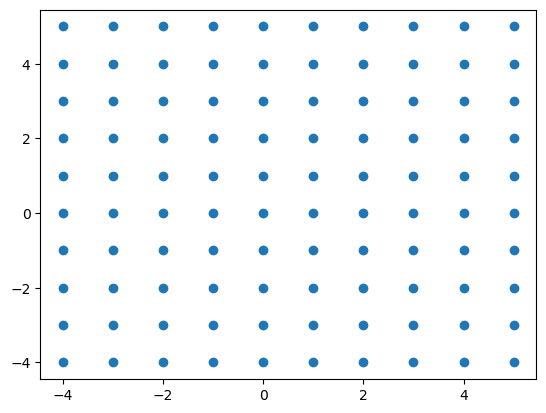

In [8]:
plt.scatter(x_vals,y_vals)

In [9]:
import gurobipy as gb
import random

In [10]:
model_turbines = gb.Model()

Restricted license - for non-production use only - expires 2023-10-25


In [11]:
budget = 30

In [12]:
turbines = []
for i in range(50):
    turbines.append(i+1)
print(turbines)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [13]:
power_values = []
for i in range(50):
    power_values.append(random.randrange(25, 50))
print(power_values)

[28, 42, 46, 31, 32, 40, 26, 31, 48, 25, 48, 49, 25, 36, 32, 27, 32, 26, 40, 34, 28, 29, 49, 47, 43, 48, 49, 46, 49, 39, 46, 43, 35, 36, 35, 37, 27, 38, 30, 39, 43, 29, 48, 27, 40, 38, 40, 26, 42, 49]


In [14]:
cost_per_turbine = []
for i in range(50):
    cost_per_turbine.append(round(random.uniform(1.5, 4), 2))
print(cost_per_turbine)

[2.62, 3.99, 3.08, 3.98, 3.33, 3.99, 1.88, 1.67, 2.62, 3.73, 1.94, 3.23, 2.48, 2.24, 2.51, 2.51, 3.79, 2.67, 2.26, 2.52, 1.62, 1.71, 3.43, 2.68, 2.37, 2.21, 3.46, 3.92, 3.86, 2.84, 1.9, 1.58, 3.68, 3.28, 1.58, 3.28, 3.39, 2.46, 2.37, 2.1, 2.86, 1.79, 2.05, 1.9, 3.3, 3.58, 2.18, 1.72, 2.19, 2.5]


In [15]:
turbine_var = model_turbines.addVars(turbines, vtype = gb.GRB.BINARY)

In [16]:
model_turbines.addConstr(gb.quicksum(turbine_var[i+1]*cost_per_turbine[i] for i in range(50)) <= budget)

<gurobi.Constr *Awaiting Model Update*>

In [17]:
model_turbines.setObjective(gb.quicksum(turbine_var[i+1]*power_values[i] for i in range(50)), gb.GRB.MAXIMIZE)

In [18]:
model_turbines.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 50 columns and 50 nonzeros
Model fingerprint: 0xdaf0429d
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [2e+00, 4e+00]
  Objective range  [2e+01, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 3e+01]
Found heuristic solution: objective 372.0000000
Presolve time: 0.00s
Presolved: 1 rows, 50 columns, 50 nonzeros
Variable types: 0 continuous, 50 integer (50 binary)
Found heuristic solution: objective 538.0000000

Root relaxation: objective 6.149067e+02, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  614.90672    0    1  538.00000  614.90672  14.3%     -    0s
H    0     0                    

In [19]:
for i in turbines:
    if turbine_var[i].x == 1:
        print(i, power_values[i-1], cost_per_turbine[i-1])

8 31 1.67
11 48 1.94
19 40 2.26
21 28 1.62
22 29 1.71
25 43 2.37
26 48 2.21
31 46 1.9
32 43 1.58
35 35 1.58
40 39 2.1
43 48 2.05
47 40 2.18
49 42 2.19
50 49 2.5
